In [1]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, SGDRegressor
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
%pylab inline
import warnings
warnings.filterwarnings('ignore')

Populating the interactive namespace from numpy and matplotlib


In [2]:
data = pd.read_csv("Data/project_modified.csv", index_col=0)
data.head()

,avg_del_days,avg_est_del_days,upt,freight_value,review_score,avg_resp_days,sales_range
seller,,,,,,,
S1,20,28,1.60,37.76,3.35,3,4
S2,12,26,1.06,41.18,4.28,3,4
S3,14,23,1.15,17.61,3.80,2,4
S4,14,22,1.16,21.84,4.10,3,4
S5,8,19,1.11,13.97,4.30,2,4


In [3]:
print('Means of numerical attributes')
d_numeric = data[['avg_del_days','avg_est_del_days','upt','freight_value','review_score','avg_resp_days']]
d_num_mean = d_numeric.mean()
d_num_mean

Means of numerical attributes


avg_del_days        11.529293
avg_est_del_days    22.916162
upt                  1.162589
freight_value       23.319700
review_score         4.135993
avg_resp_days        2.229630
dtype: float64

In [4]:
print('Standard deviations of numerical attributes')
d_num_std = (d_numeric - d_num_mean) / d_numeric.std()
d_num_std.head(10)

Standard deviations of numerical attributes


,avg_del_days,avg_est_del_days,upt,freight_value,review_score,avg_resp_days
seller,,,,,,
S1,1.630016,0.816477,1.220328,0.769409,-0.970902,0.336821
S2,0.090578,0.495272,-0.286213,0.951634,0.177885,0.336821
S3,0.475438,0.013465,-0.035123,-0.304225,-0.415037,-0.100399
S4,0.475438,-0.147138,-0.007224,-0.078842,-0.044461,0.336821
S5,-0.679141,-0.628945,-0.146718,-0.498171,0.202590,-0.100399
S6,0.283008,0.013465,-0.342011,-0.419847,-0.056813,-0.100399
S7,-0.101852,0.655874,-0.090920,-0.348982,-0.205044,-0.100399
S8,-0.101852,0.013465,-0.258314,0.237654,0.165532,-0.100399
S9,-0.101852,-0.468343,-0.453606,-0.382549,0.276705,0.336821


In [5]:
print('Statistic Summary of numerical attributes')
d_numeric.describe()

Statistic Summary of numerical attributes


,avg_del_days,avg_est_del_days,upt,freight_value,review_score,avg_resp_days
count,2970.000000,2970.000000,2970.000000,2970.000000,2970.000000,2970.000000
mean,11.529293,22.916162,1.162589,23.319700,4.135993,2.229630
std,5.196702,6.226556,0.358437,18.768037,0.809550,2.287179
min,-5.000000,1.000000,1.000000,0.750000,1.000000,0.000000
25%,8.000000,19.000000,1.000000,14.842500,3.880000,1.000000
50%,11.000000,23.000000,1.020000,18.235000,4.250000,2.000000
75%,14.000000,26.000000,1.180000,24.320000,4.687500,3.000000
max,53.000000,59.000000,8.000000,308.340000,5.000000,57.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2970 entries, S1 to S2970
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   avg_del_days      2970 non-null   int64  
 1   avg_est_del_days  2970 non-null   int64  
 2   upt               2970 non-null   float64
 3   freight_value     2970 non-null   float64
 4   review_score      2970 non-null   float64
 5   avg_resp_days     2970 non-null   int64  
 6   sales_range       2970 non-null   int64  
dtypes: float64(3), int64(4)
memory usage: 185.6+ KB


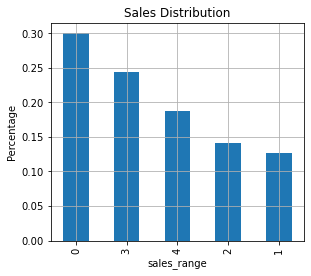

In [7]:
temp = data["sales_range"].value_counts()/data["sales_range"].count()

fig = plt.figure(figsize=(10,4))
ax1 = fig.add_subplot(122)
ax1.set_xlabel('sales_range')
ax1.set_ylabel('Percentage')
ax1.set_title("Sales Distribution")
temp.plot(kind='bar', grid = True)

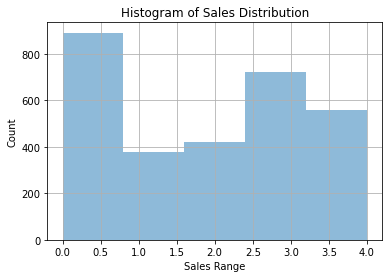

In [8]:
plt.hist(data["sales_range"], bins=5, alpha=0.5)
plt.xlabel('Sales Range')
plt.ylabel('Count')
plt.title('Histogram of Sales Distribution')
plt.grid(True)

In [9]:
# Min-Max normalization performed on the full numeric data set
d_norm = (data - data.min()) / (data.max()-data.min())
corr_matrix = d_norm.corr()
print('Basic Correlation Analysis Matrix:')
corr_matrix

Basic Correlation Analysis Matrix:


,avg_del_days,avg_est_del_days,upt,freight_value,review_score,avg_resp_days,sales_range
avg_del_days,1.000000,0.456719,-0.019380,0.183198,-0.377852,0.060785,0.084747
avg_est_del_days,0.456719,1.000000,-0.021489,0.163968,-0.097259,0.067550,0.063704
upt,-0.019380,-0.021489,1.000000,-0.071512,-0.153831,-0.018975,0.045628
freight_value,0.183198,0.163968,-0.071512,1.000000,-0.016073,-0.022546,0.191796
review_score,-0.377852,-0.097259,-0.153831,-0.016073,1.000000,-0.016369,-0.042841
avg_resp_days,0.060785,0.067550,-0.018975,-0.022546,-0.016369,1.000000,-0.016089
sales_range,0.084747,0.063704,0.045628,0.191796,-0.042841,-0.016089,1.000000


Boxplot of Sales Range and Average Delivery Days


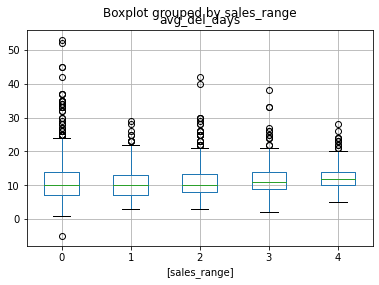

In [10]:
print('Boxplot of Sales Range and Average Delivery Days')
data.boxplot(column=['avg_del_days'], by=['sales_range'])
plt.show()

Boxplot of Sales Range and Average Estimate Delivery Days


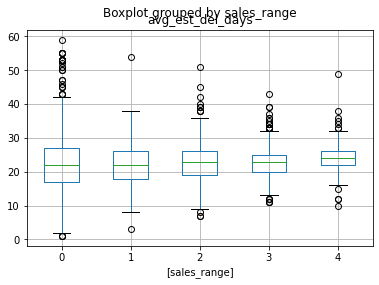

In [11]:
print('Boxplot of Sales Range and Average Estimate Delivery Days')
data.boxplot(column=['avg_est_del_days'], by=['sales_range'])
plt.show()

Boxplot of Sales Range and Average Unit Per Transaction


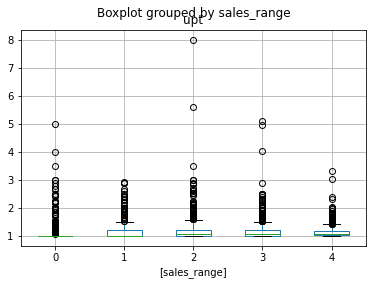

In [12]:
print('Boxplot of Sales Range and Average Unit Per Transaction')
data.boxplot(column=['upt'], by=['sales_range'])
plt.show()

Boxplot of Sales Range and Average Frieght Value


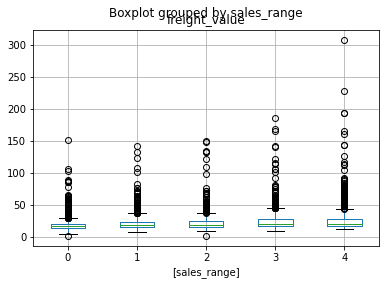

In [13]:
print('Boxplot of Sales Range and Average Frieght Value')
data.boxplot(column=['freight_value'], by=['sales_range'])
plt.show()

Boxplot of Sales Range and Average Review Score


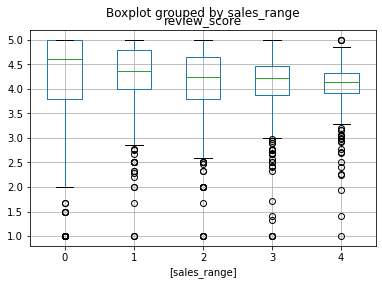

In [14]:
print('Boxplot of Sales Range and Average Review Score')
data.boxplot(column=['review_score'], by=['sales_range'])
plt.show()

### 5.1.1	Application of Nearest-neighbor Classification

In [15]:
# Separate the target attribute as y and 
y = data['sales_range']
x = data[['avg_del_days','avg_est_del_days','upt','freight_value','review_score','avg_resp_days']]

In [16]:
# Convert data frame to array and then add '1' to every vector
xVec = x.to_numpy()
x = np.array([np.concatenate((v,[1])) for v in xVec])

In [17]:
# Preparation: transform data to matrix
x = np.array(x)
y = np.array(y).flatten()

In [18]:
# Create a 20%-80% randomized split of the data.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = \
        train_test_split(x, y, test_size=0.2, random_state=33)

In [19]:
def knn_search(x, D, K, measure):
    """ find K nearest neighbors of an instance x among the instances in D """
    if measure == 0:
        # euclidean distances from the other points
        dists = np.sqrt(((D - x)**2).sum(axis=1))
    elif measure == 1:
        # first find the vector norm for each instance in D as wel as the norm for vector x
        D_norm = np.array([np.linalg.norm(D[i]) for i in range(len(D))])
        x_norm = np.linalg.norm(x)
        # Compute Cosine: divide the dot product o x and each instance in D by the product of the two norms
        sims = np.dot(D,x)/(D_norm * x_norm)
        # The distance measure will be the inverse of Cosine similarity
        dists = 1 - sims
    idx = np.argsort(dists) # sorting
    # return the indexes of K nearest neighbors
    return idx[:K], dists

def knn_classify(x, D, K, labels, measure):
    from collections import Counter
    neigh_idx, distances = knn_search(x, D, K, measure)
    neigh_labels = labels[neigh_idx]
    count = Counter(neigh_labels)
    #print("Labels for top ", K, "neighbors: ", count.most_common())
    predicted_label = count.most_common(1)[0][0]
    return neigh_idx, predicted_label

In [20]:
from sklearn.metrics import classification_report

def knn_evaluate(x_test, y_test, x_train, y_train, K, measure):
    accuracyCount = 0.0
    for i in range(len(y_test)):
        classifierResult, predicted_class = knn_classify(x_test[i,:], x_train, K, y_train, measure)
        if (predicted_class == y_test[i]): 
                accuracyCount += 1.0
    accuracyRate = accuracyCount/float(len(y_test))
    print("the accuracy rate for",K, "nearest neighbors is: ", accuracyRate)
    return accuracyRate

In [21]:
%%time
# Run evaluation function with Euclidean distance and put result to a list
Euclid = []
for K in range(5, 100, 5):
    Euclid.append(knn_evaluate(X_test, y_test, X_train, y_train, K, 0))

the accuracy rate for 5 nearest neighbors is:  0.40235690235690236
the accuracy rate for 10 nearest neighbors is:  0.40235690235690236
the accuracy rate for 15 nearest neighbors is:  0.39730639730639733
the accuracy rate for 20 nearest neighbors is:  0.40404040404040403
the accuracy rate for 25 nearest neighbors is:  0.3956228956228956
the accuracy rate for 30 nearest neighbors is:  0.4074074074074074
the accuracy rate for 35 nearest neighbors is:  0.42424242424242425
the accuracy rate for 40 nearest neighbors is:  0.4107744107744108
the accuracy rate for 45 nearest neighbors is:  0.4107744107744108
the accuracy rate for 50 nearest neighbors is:  0.42424242424242425
the accuracy rate for 55 nearest neighbors is:  0.41414141414141414
the accuracy rate for 60 nearest neighbors is:  0.41414141414141414
the accuracy rate for 65 nearest neighbors is:  0.42424242424242425
the accuracy rate for 70 nearest neighbors is:  0.41245791245791247
the accuracy rate for 75 nearest neighbors is:  0.409

In [22]:
%%time
# Run evaluation function with Cosine distance and put result to a list
Cosine = []
for K in range(5, 100, 5):
    Cosine.append(knn_evaluate(X_test, y_test, X_train, y_train, K, 1))

the accuracy rate for 5 nearest neighbors is:  0.39225589225589225
the accuracy rate for 10 nearest neighbors is:  0.41414141414141414
the accuracy rate for 15 nearest neighbors is:  0.41245791245791247
the accuracy rate for 20 nearest neighbors is:  0.4377104377104377
the accuracy rate for 25 nearest neighbors is:  0.4208754208754209
the accuracy rate for 30 nearest neighbors is:  0.43097643097643096
the accuracy rate for 35 nearest neighbors is:  0.4377104377104377
the accuracy rate for 40 nearest neighbors is:  0.43602693602693604
the accuracy rate for 45 nearest neighbors is:  0.4377104377104377
the accuracy rate for 50 nearest neighbors is:  0.43434343434343436
the accuracy rate for 55 nearest neighbors is:  0.43097643097643096
the accuracy rate for 60 nearest neighbors is:  0.43097643097643096
the accuracy rate for 65 nearest neighbors is:  0.4175084175084175
the accuracy rate for 70 nearest neighbors is:  0.42424242424242425
the accuracy rate for 75 nearest neighbors is:  0.4208

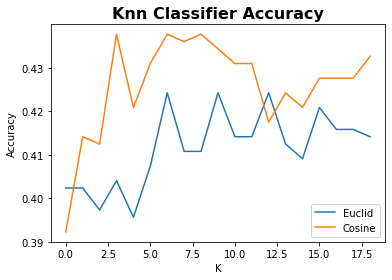

In [23]:
plt.plot(Euclid, label="Euclid")
plt.plot(Cosine, label="Cosine")

# Add legend
plt.legend()
# Add title and x, y labels
plt.title("Knn Classifier Accuracy", fontsize=16, fontweight='bold')
plt.xlabel("K")
plt.ylabel("Accuracy")

plt.show()

In [24]:
y_pred_20 = []
for i in range(len(y_train)):
    classifierResult, predicted_class = knn_classify(X_train[i,:], X_train, 20, y_train, 1)
    y_pred_20.append(predicted_class)
    
y_pred_20 = np.array(y_pred_20)

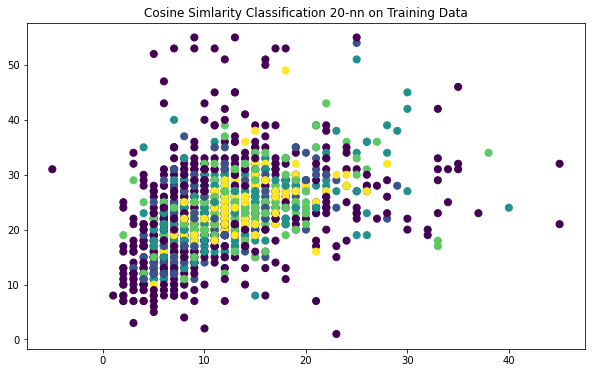

In [25]:
plt.figure(figsize = (10,6))
plt.scatter(X_train[:,0], X_train[:,1], c=y_train, marker='o', s=50)
plt.title('Cosine Simlarity Classification 20-nn on Training Data')
plt.show()

In [26]:
y_pred_20 = []
for i in range(len(y_test)):
    classifierResult, predicted_class = knn_classify(X_test[i,:], X_train, 20, y_train, 1)
    y_pred_20.append(predicted_class)
    
y_pred_20 = np.array(y_pred_20)

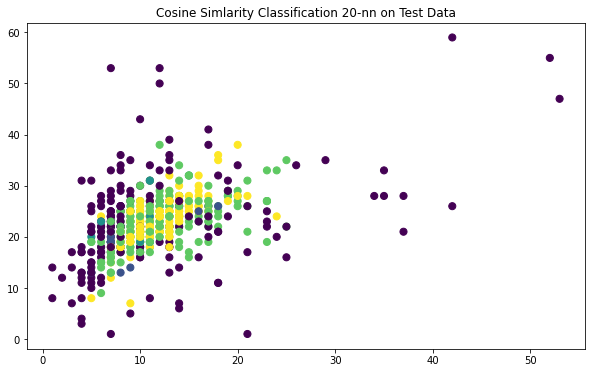

In [27]:
plt.figure(figsize = (10,6))
plt.scatter(X_test[:,0], X_test[:,1], c=y_pred_20, marker='o', s=50)
plt.title('Cosine Simlarity Classification 20-nn on Test Data')
plt.show()

### 5.2.1.	Application of Standard Regression and Penalized Regressions

In [28]:
# plot the model's mean absolute error values 
# on cross-validation using only the selected features
def measure_performance(X, y, model):
    from sklearn import metrics    
    y_pred = model.predict(X)
    rsq = metrics.r2_score(y, y_pred)
    MAE = metrics.mean_absolute_error(y, y_pred)
    return rsq, MAE

In [29]:
np.set_printoptions(precision=2, linewidth=120, suppress=True, edgeitems=7)
linreg = LinearRegression()

In [30]:
from sklearn import feature_selection
from sklearn.model_selection import cross_val_score

# Write a script that takes as input the training data, target variable; the model; 
# and any other parameters you find necessary, and returns the optimal percentage 
# of the most informative features to use
percentiles = range(1, 100, 5)
results = []
for i in range(1, 100, 5):
    fs = feature_selection.SelectPercentile(feature_selection.f_regression, percentile=i)
    X_train_fs = fs.fit_transform(X_train, y_train)
    scores = cross_val_score(linreg, X_train_fs, y_train, cv=5)
    print("%2d  %0.4f" % (i, scores.mean()))
    results = np.append(results, scores.mean())

 1  0.0335
 6  0.0335
11  0.0335
16  0.0335
21  0.0386
26  0.0386
31  0.0386
36  0.0373
41  0.0373
46  0.0373
51  0.0369
56  0.0369
61  0.0369
66  0.0369
71  0.0367
76  0.0367
81  0.0367
86  0.0360
91  0.0360
96  0.0360


Optimal percentile of features: 21 

Optimal number of features: 623 



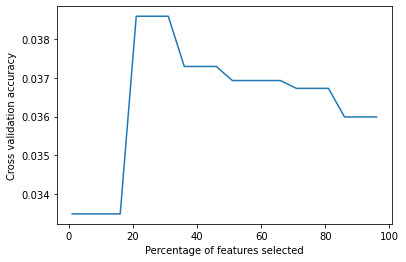

In [31]:
optimal_percentile_ind = np.where(results == results.max())[0][0]
print("Optimal percentile of features: {0}".format(percentiles[optimal_percentile_ind]), "\n")
optimal_num_features = int(percentiles[optimal_percentile_ind]*x.shape[0]/100)
print("Optimal number of features: {0}".format(optimal_num_features), "\n")

# Plot percentile of features VS. cross-validation scores
import pylab as pl
pl.figure()
pl.xlabel("Percentage of features selected")
pl.ylabel("Cross validation accuracy")
pl.plot(percentiles, results)

In [32]:
# Applying Optimal percentile of features (21) on training set to for fs
fs = feature_selection.SelectPercentile(feature_selection.f_regression, percentile=21)
X_train_fs = fs.fit_transform(X_train, y_train)

In [33]:
# Show the list of most informative variables and their weights
d_names = data.columns.values
d = data[d_names[:-2]]
d_names = np.array([])
fs_scores = np.array([])
for i in range(len(d.columns.values)):
    if fs.get_support()[i]:
        d2_names = np.append(d.columns.values[i], [d.columns.values[i]])
        fs_scores = np.append(fs.scores_[i], [fs.scores_[i]])
        print("%10s  %3.2f" % (d.columns.values[i], fs.scores_[i]))

avg_del_days  32.21
freight_value  96.48


In [34]:
#linreg = LinearRegression()
linreg.fit(X_train_fs, y_train)
X_test_fs = fs.fit_transform(X_test, y_test)
rsq, mae = measure_performance(X_test_fs, y_test, linreg)
print('Standard Regression R-Square on test: {0:.3f}'.format(rsq))
print('Standard Regression MAE on test: {0:.3f}'.format(mae))

Standard Regression R-Square on test: -0.009
Standard Regression MAE on test: 1.396


### Find the optimal alpha for Ridge and Lasso

In [35]:
def cross_validate(model, x, y, n, verbose=False):
    # model: regression model to be trained
    # X: the data matrix
    # y: the target variable array
    # n: the number of fold for x-validation
    # Returns mean RMSE across all folds
    
    from sklearn.model_selection import KFold
    kf = KFold(n_splits=n, random_state=22)
    xval_err = 0
    f = 1
    for train,test in kf.split(x):
        model.fit(x[train],y[train])
        p = model.predict(x[test])
        e = p-y[test]
        rmse = np.sqrt(np.dot(e,e)/len(x[test]))
        if verbose:
            print("Fold %2d RMSE: %.4f" % (f, rmse))
        xval_err += rmse
        f += 1
    return xval_err/n

In [36]:
def fun (x, y):
    alpha = np.linspace(.01,20,50)
    aList = np.array([])
    t_rmse_R = np.array([])
    cv_rmse_R = np.array([])
    t_rmse_L = np.array([])
    cv_rmse_L = np.array([])
    print('method\t alpha\t rmse_train\t rmse_10cv')
    
    for a in alpha:
        
        ridge = Ridge(alpha=a)
        ridge.fit(X_train,y_train)
        p = ridge.predict(X_train)
        err = p-y_train
        total_error = np.dot(err,err)
        rmse_train = np.sqrt(total_error/len(p))
        rmse_10cv = cross_validate(ridge, x, y, 10)
        t_rmse_R = np.append(t_rmse_R, [rmse_train])
        cv_rmse_R = np.append(cv_rmse_R, [rmse_10cv])
        print('{}\t {:.3f}\t {:.4f}\t\t {:.4f}'.format('Ridge',a,rmse_train,rmse_10cv))

        lasso = Lasso(alpha=a)
        lasso.fit(X_train,y_train)
        p = lasso.predict(X_train)
        err = p-y_train
        total_error = np.dot(err,err)
        rmse_train = np.sqrt(total_error/len(p))
        rmse_10cv = cross_validate(lasso, x, y, 10)
        aList = np.append(aList, [alpha])
        t_rmse_L = np.append(t_rmse_L, [rmse_train])
        cv_rmse_L = np.append(cv_rmse_L, [rmse_10cv])
        print('{}\t {:.3f}\t {:.4f}\t\t {:.4f}'.format('Lasso',a,rmse_train,rmse_10cv),'\n')
        
    return aList, t_rmse_R, cv_rmse_R, t_rmse_L, cv_rmse_L

In [37]:
aList, t_rmse_R, cv_rmse_R, t_rmse_L, cv_rmse_L = fun (x, y)

method	 alpha	 rmse_train	 rmse_10cv
Ridge	 0.010	 1.4789		 1.5515
Lasso	 0.010	 1.4792		 1.5519 

Ridge	 0.418	 1.4789		 1.5515
Lasso	 0.418	 1.4848		 1.5528 

Ridge	 0.826	 1.4789		 1.5515
Lasso	 0.826	 1.4879		 1.5522 

Ridge	 1.234	 1.4789		 1.5515
Lasso	 1.234	 1.4886		 1.5531 

Ridge	 1.642	 1.4789		 1.5515
Lasso	 1.642	 1.4897		 1.5543 

Ridge	 2.050	 1.4789		 1.5515
Lasso	 2.050	 1.4910		 1.5559 

Ridge	 2.458	 1.4789		 1.5515
Lasso	 2.458	 1.4927		 1.5578 

Ridge	 2.866	 1.4789		 1.5515
Lasso	 2.866	 1.4946		 1.5601 

Ridge	 3.274	 1.4789		 1.5515
Lasso	 3.274	 1.4968		 1.5627 

Ridge	 3.682	 1.4789		 1.5515
Lasso	 3.682	 1.4994		 1.5656 

Ridge	 4.090	 1.4789		 1.5515
Lasso	 4.090	 1.5022		 1.5689 

Ridge	 4.498	 1.4789		 1.5515
Lasso	 4.498	 1.5053		 1.5725 

Ridge	 4.906	 1.4789		 1.5515
Lasso	 4.906	 1.5087		 1.5762 

Ridge	 5.313	 1.4789		 1.5515
Lasso	 5.313	 1.5124		 1.5782 

Ridge	 5.721	 1.4789		 1.5515
Lasso	 5.721	 1.5164		 1.5784 

Ridge	 6.129	 1.4789		 1.5515
Las

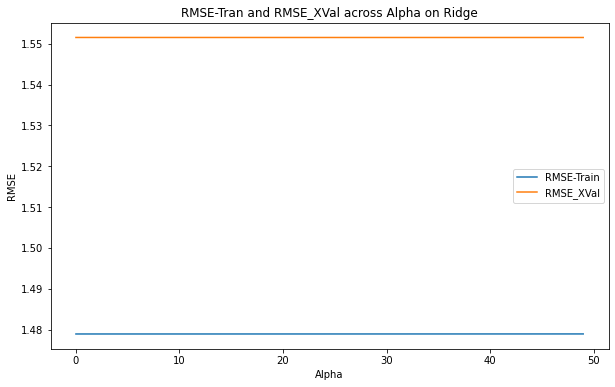

In [38]:
fig = pl.figure(figsize=(10,6))
ax = fig.add_subplot(111)
ax.plot(t_rmse_R, label='RMSE-Train_R')
ax.plot(cv_rmse_R, label='RMSE_XVal_R')
pl.legend(('RMSE-Train', 'RMSE_XVal'))
pl.title('RMSE-Tran and RMSE_XVal across Alpha on Ridge')
pl.ylabel('RMSE')
pl.xlabel('Alpha')
pl.show()

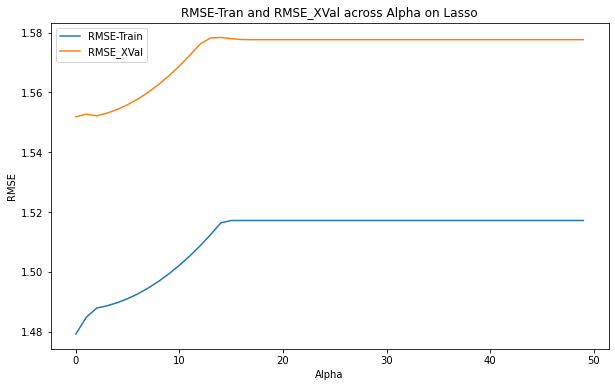

In [39]:
fig = pl.figure(figsize=(10,6))
ax = fig.add_subplot(111)
ax.plot(t_rmse_L, label='RMSE-Train_L')
ax.plot(cv_rmse_L, label='RMSE_XVal_L')
pl.legend(('RMSE-Train', 'RMSE_XVal'))
pl.title('RMSE-Tran and RMSE_XVal across Alpha on Lasso')
pl.ylabel('RMSE')
pl.xlabel('Alpha')
pl.show()

In [40]:
# Find the best Alpha
optimal_alpha_R = np.where(cv_rmse_R == cv_rmse_R.min())[0][0]
print("Ridge optimal alpha: {0}".format(aList[optimal_alpha_R]), "\n")
optimal_alpha_L = np.where(cv_rmse_L == cv_rmse_L.min())[0][0]
print("Lasso optimal alpha: {0}".format(aList[optimal_alpha_L]))

Ridge optimal alpha: 16.736326530612246 

Lasso optimal alpha: 0.01


In [41]:
# Create linear regression object with optimal ridge coefficient
ridge = Ridge(alpha=16.736326530612246)
# Train the model using the training set
ridge.fit(X_train,y_train)

rsq, mae = measure_performance(X_test, y_test, ridge)
print('Ridge Regression R-Square on test: {0:.3f}'.format(rsq))
print('Ridge Regression MAE on test: {0:.3f}'.format(mae))

Ridge Regression R-Square on test: 0.012
Ridge Regression MAE on test: 1.374


In [42]:
# Create linear regression object with optimal lasso coefficient
lasso = Lasso(alpha=0.01)
# Train the model using the training set
lasso.fit(X_train, y_train)

rsq, mae = measure_performance(X_test, y_test, lasso)
print('Laaso Regression R-Square on test: {0:.3f}'.format(rsq))
print('Lasso Regression MAE on test: {0:.3f}'.format(mae))

Laaso Regression R-Square on test: 0.012
Lasso Regression MAE on test: 1.375


### Perform regression using Stochastic Gradient Descent for regression

In [43]:
from sklearn.preprocessing import StandardScaler
# standardize features
scaler = StandardScaler()
scaler.fit(X_train)
X_train_trf = scaler.transform(X_train)

In [44]:
from sklearn.model_selection import GridSearchCV

sgdreg = SGDRegressor()
parameters = {
    'penalty': ['l1','l2'],
    'alpha': np.linspace(0.0001, 10, 20)
}
gs = GridSearchCV(sgdreg, parameters, verbose=1, cv=5)

In [45]:
%time _ = gs.fit(X_train_trf, y_train)

gs.best_params_, gs.best_score_

Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


CPU times: user 906 ms, sys: 10.2 ms, total: 916 ms
Wall time: 857 ms


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.8s finished


({'alpha': 0.0001, 'penalty': 'l1'}, 0.03597918370547219)

In [46]:
from sklearn.model_selection import KFold

def calc_params(X, y, clf, param_values, param_name, K):
    
    # Convert input to Numpy arrays
    X = np.array(X)
    y = np.array(y)

    # initialize training and testing score arrays with zeros
    train_scores = np.zeros(len(param_values))
    test_scores = np.zeros(len(param_values))
    
    # iterate over the different parameter values
    for i, param_value in enumerate(param_values):

        # set classifier parameters
        clf.set_params(**{param_name:param_value})
        
        # initialize the K scores obtained for each fold
        k_train_scores = np.zeros(K)
        k_test_scores = np.zeros(K)
        
        # create KFold cross validation
        cv = KFold(n_splits=K, shuffle=True, random_state=0)
        
        # iterate over the K folds
        j = 0
        for train, test in cv.split(X):
            # fit the classifier in the corresponding fold
            # and obtain the corresponding accuracy scores on train and test sets
            clf.fit(X[train], y[train])
            k_train_scores[j] = clf.score(X[train], y[train])
            k_test_scores[j] = clf.score(X[test], y[test])
            j += 1
            
        # store the mean of the K fold scores
        train_scores[i] = np.mean(k_train_scores)
        test_scores[i] = np.mean(k_test_scores)
        print(param_name, '=', param_value, "Train =", train_scores[i], "Test =", test_scores[i])
       
    # plot the training and testing scores in a log scale
    plt.plot(param_values, train_scores, label='Train', alpha=0.4, lw=2, c='b')
    plt.plot(param_values, test_scores, label='X-Val', alpha=0.4, lw=2, c='g')
    plt.legend(loc=7)
    plt.xlabel(param_name + " values")
    plt.ylabel("Mean cross validation accuracy")

    # return the training and testing scores on each parameter value
    return train_scores, test_scores

In [47]:
# Using the best parameters, apply the model to the set-aside test data.
sgdreg = SGDRegressor(penalty='l1', alpha=0.0001)
sgdreg.fit(X_train_trf, y_train)
X_test_trf = scaler.transform(X_test)

rsq, mae = measure_performance(X_test_trf, y_test, sgdreg)
print('SGDRegressor l1 R-Square on test: {0:.3f}'.format(rsq))
print('SGDRegressor l1 MAE on test: {0:.3f}'.format(mae))

SGDRegressor l1 R-Square on test: 0.012
SGDRegressor l1 MAE on test: 1.375


l1_ratio = 0.0 Train = 0.04977863336602797 Test = 0.04372871237154861
l1_ratio = 0.05263157894736842 Train = 0.04954652321651869 Test = 0.04491900596594263
l1_ratio = 0.10526315789473684 Train = 0.04953678329964952 Test = 0.044431229406436755
l1_ratio = 0.15789473684210525 Train = 0.04935758282747042 Test = 0.043823519472898774
l1_ratio = 0.21052631578947367 Train = 0.0496591417207374 Test = 0.045122045245574574
l1_ratio = 0.2631578947368421 Train = 0.049885179279455925 Test = 0.04545837996467652
l1_ratio = 0.3157894736842105 Train = 0.049340817799187864 Test = 0.04431400666790526
l1_ratio = 0.3684210526315789 Train = 0.04955464705574249 Test = 0.044790741448694285
l1_ratio = 0.42105263157894735 Train = 0.049098927435373786 Test = 0.04439107402993607
l1_ratio = 0.47368421052631576 Train = 0.04958893304532486 Test = 0.04263345681862414
l1_ratio = 0.5263157894736842 Train = 0.0495095168602673 Test = 0.045313210134525474
l1_ratio = 0.5789473684210527 Train = 0.04980766225288504 Test = 0.0

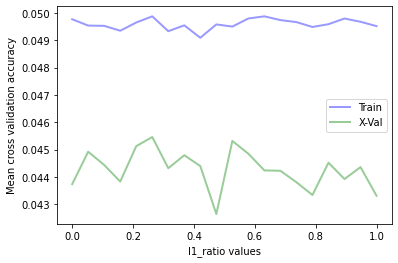

In [48]:
# Let's create an evenly spaced range of numbers in a specified interval
md = np.linspace(0.00, 1.00, 20, dtype=float)
md = np.array([float(e) for e in md])

sgdreg = SGDRegressor(penalty='elasticnet', alpha=0.0001)
train_scores, test_scores = calc_params(X_train_trf, y_train, sgdreg, md, 'l1_ratio', 5)

In [49]:
optimal_l1_ratio = np.where(test_scores == test_scores.max())[0][0]
print("Optimal l1_ratio: {0}".format(md[optimal_l1_ratio]))

Optimal l1_ratio: 0.2631578947368421


In [63]:
sgdreg = SGDRegressor(penalty='elasticnet', alpha=0.0001, l1_ratio=0.2631578947368421)
sgdreg.fit(X_train_trf, y_train)
X_test_trf = scaler.transform(X_test)

rsq, mae = measure_performance(X_test_trf, y_test, sgdreg)
print('SGDRegressor (elasticnet) R-Square on test: {0:.3f}'.format(rsq))
print('SGDRegressor (elasticnet) MAE on test: {0:.3f}'.format(mae))

SGDRegressor (elasticnet) R-Square on test: 0.009
SGDRegressor (elasticnet) MAE on test: 1.377


### Application of Ada Boost

In [51]:
from sklearn.ensemble import AdaBoostClassifier

# n_estimators int, default=50; learning_rate float, default=1
ab = AdaBoostClassifier()
ab = ab.fit(X_train, y_train)

#### A versatile function to measure performance of a model

In [52]:
from sklearn import metrics

def measure_performance2(X, y, clf, show_accuracy=True, show_classification_report=True, show_confusion_matrix=True):
    y_pred = clf.predict(X)   
    if show_accuracy:
        rsq = metrics.r2_score(y, y_pred)
        mae = metrics.mean_absolute_error(y, y_pred)
        print('Ada Boost R-Square on test: {0:.3f}'.format(rsq))
        print('Ada Boost MAE on test: {0:.3f}'.format(mae),'\n')
            
    if show_classification_report:
        print("Classification report")
        print(metrics.classification_report(y, y_pred),"\n")
      
    if show_confusion_matrix:
        print("Confusion matrix")
        print(metrics.confusion_matrix(y, y_pred),"\n")

In [53]:
measure_performance2(X_test, y_test, ab, show_confusion_matrix=True, show_classification_report=True)

Ada Boost R-Square on test: 0.402
Ada Boost MAE on test: 0.727 

Classification report
              precision    recall  f1-score   support

           0       0.65      0.79      0.71       173
           1       0.38      0.16      0.22        82
           2       0.14      0.07      0.09        69
           3       0.45      0.62      0.52       154
           4       0.60      0.53      0.57       116

    accuracy                           0.53       594
   macro avg       0.45      0.43      0.42       594
weighted avg       0.49      0.53      0.50       594
 

Confusion matrix
[[136   8  13  14   2]
 [ 35  13  10  20   4]
 [ 20   4   5  34   6]
 [ 14   7   8  96  29]
 [  3   2   1  48  62]] 



### Find the optimal number of estimators in the ensemble

n_estimators = 5 Train = 0.44844358924665684 Test = 0.4431835471030518
n_estimators = 10 Train = 0.49484404330130954 Test = 0.4856930561698364
n_estimators = 15 Train = 0.49726492981533266 Test = 0.4869411764705882
n_estimators = 20 Train = 0.5078913037459509 Test = 0.4987279964617426
n_estimators = 25 Train = 0.5175710844707772 Test = 0.49915347191508186
n_estimators = 30 Train = 0.5093644896038096 Test = 0.49031490490933216
n_estimators = 35 Train = 0.5111527450926105 Test = 0.48442547545333925
n_estimators = 40 Train = 0.5063111381821201 Test = 0.47979566563467496
n_estimators = 45 Train = 0.5094684238212575 Test = 0.4831605484298983
n_estimators = 50 Train = 0.5103108613195271 Test = 0.47978770455550646
n_estimators = 55 Train = 0.5112566793100585 Test = 0.49157540911101283
n_estimators = 60 Train = 0.5135720258035936 Test = 0.49325696594427243
n_estimators = 65 Train = 0.5155711952158144 Test = 0.48736842105263156
n_estimators = 70 Train = 0.518833079542623 Test = 0.48904997788589

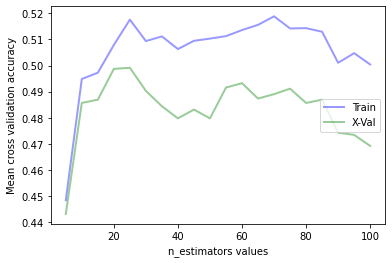

In [54]:
n_est = range(5, 101, 5)
train_scores, test_scores = calc_params(X_train, y_train, ab, n_est, 'n_estimators', 5)

In [55]:
# learning_rate float, default=1
ab = AdaBoostClassifier(n_estimators=25)
ab = ab.fit(X_train, y_train)
measure_performance2(X_test, y_test, ab, show_confusion_matrix=True, show_classification_report=True)

Ada Boost R-Square on test: 0.337
Ada Boost MAE on test: 0.756 

Classification report
              precision    recall  f1-score   support

           0       0.61      0.81      0.70       173
           1       0.31      0.10      0.15        82
           2       0.42      0.07      0.12        69
           3       0.46      0.66      0.54       154
           4       0.57      0.53      0.55       116

    accuracy                           0.53       594
   macro avg       0.47      0.43      0.41       594
weighted avg       0.50      0.53      0.49       594
 

Confusion matrix
[[140  10   2  17   4]
 [ 43   8   2  23   6]
 [ 21   4   5  30   9]
 [ 22   2   1 101  28]
 [  2   2   2  48  62]] 



#### Learning rate shrinks the contribution of each classifier by "learning_rate". There is a trade-off between "learning_rate" and "n_estimators"

In [56]:
lr = [0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.6, 0.7, 0.8, 0.9, 1.0, 1.3, 1.5, 1.8, 2.0]

learning_rate = 0.01 Train = 0.41540402558210365 Test = 0.41540380362671386
learning_rate = 0.05 Train = 0.4492843101968493 Test = 0.44149491375497574
learning_rate = 0.1 Train = 0.45980608543979623 Test = 0.45580716497125157
learning_rate = 0.2 Train = 0.4967386693983776 Test = 0.481061477222468
learning_rate = 0.3 Train = 0.5126258202054321 Test = 0.4949500221141088
learning_rate = 0.4 Train = 0.5213585647443175 Test = 0.4983175586023883
learning_rate = 0.6 Train = 0.5259881502810155 Test = 0.5037877045555064
learning_rate = 0.7 Train = 0.5237771809850772 Test = 0.49662715612560815
learning_rate = 0.8 Train = 0.5203062100279632 Test = 0.5004175143741707
learning_rate = 0.9 Train = 0.5100998920235887 Test = 0.4789544449358691
learning_rate = 1.0 Train = 0.5103108613195271 Test = 0.47978770455550646
learning_rate = 1.3 Train = 0.47442886015670427 Test = 0.44738257408226445
learning_rate = 1.5 Train = 0.5029467039508292 Test = 0.46168244139761166
learning_rate = 1.8 Train = 0.4781143996

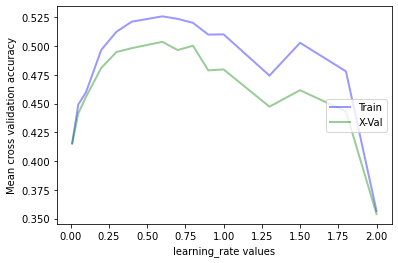

In [57]:
ab = AdaBoostClassifier()
train_scores, test_scores = calc_params(X_train, y_train, ab, lr, 'learning_rate', 5)

In [58]:
# n_estimatorsint, default=50
ab = AdaBoostClassifier(learning_rate=0.6)
ab = ab.fit(X_train, y_train)
measure_performance2(X_test, y_test, ab, show_confusion_matrix=True, show_classification_report=True)

Ada Boost R-Square on test: 0.338
Ada Boost MAE on test: 0.771 

Classification report
              precision    recall  f1-score   support

           0       0.64      0.77      0.70       173
           1       0.30      0.07      0.12        82
           2       0.25      0.06      0.09        69
           3       0.41      0.64      0.50       154
           4       0.59      0.54      0.57       116

    accuracy                           0.52       594
   macro avg       0.44      0.42      0.40       594
weighted avg       0.48      0.52      0.47       594
 

Confusion matrix
[[134   7   3  28   1]
 [ 38   6   6  29   3]
 [ 20   3   4  35   7]
 [ 15   4   3  99  33]
 [  4   0   0  49  63]] 



#### Let's use grid search to explore the parameter space more systematically

In [59]:
ab = AdaBoostClassifier()

parameters = {
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.6, 0.7, 0.8, 0.9, 1.0, 1.3, 1.5, 1.8, 2.0],
    'n_estimators': range(5, 101, 5),
}

gs = GridSearchCV(ab, parameters, cv=3)

In [60]:
%time _ = gs.fit(X_train, y_train)

CPU times: user 2min 54s, sys: 2.87 s, total: 2min 57s
Wall time: 3min 17s


In [61]:
gs.best_params_, gs.best_score_

({'learning_rate': 0.4, 'n_estimators': 45}, 0.4987373737373737)

### AdaBoost model with GridSearchCV

In [62]:
ab = AdaBoostClassifier(n_estimators=45, learning_rate=0.4)
ab = ab.fit(X_train, y_train)
measure_performance2(X_test, y_test, ab, show_confusion_matrix=True, show_classification_report=True)

Ada Boost R-Square on test: 0.321
Ada Boost MAE on test: 0.796 

Classification report
              precision    recall  f1-score   support

           0       0.64      0.77      0.70       173
           1       0.25      0.02      0.04        82
           2       0.20      0.06      0.09        69
           3       0.39      0.69      0.50       154
           4       0.57      0.39      0.46       116

    accuracy                           0.49       594
   macro avg       0.41      0.39      0.36       594
weighted avg       0.45      0.49      0.44       594
 

Confusion matrix
[[134   5   3  29   2]
 [ 37   2   9  31   3]
 [ 19   0   4  42   4]
 [ 17   1   4 107  25]
 [  3   0   0  68  45]] 

